In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
import datetime
from lib import bitmex
from lib.bitmex import BitMEX
from settings import API_BASE, API_KEY, API_SECRET
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from scipy.signal import *

In [78]:
plt.rcParams['figure.figsize'] = [10, 10]


In [ ]:
## THERE'S SOMETHING HERE ####
#CCIsav = sp.signal.savgol_filter(CCI, 305, 3)
fil = sp.signal.savgol_filter(RSI100, 105, 3)
dFdt = pd.Series(np.zeros(l))
dF2 = pd.Series(np.zeros(l))
for i in range(1, len(fil)):
    dFdt[i] = fil[i]-fil[i-1]
    dF2[i] = dFdt[i] - dFdt[i-1]
dFdt = sp.signal.savgol_filter(dFdt, 25, 3)
dF2 = sp.signal.savgol_filter(dF2, 75, 3)

plt.rcParams['figure.figsize'] = [10, 10]

m = 4
J = np.arange(1, l)
plt.subplot(m,1,1)
plt.plot(J, close[J])
#plt.subplot(5,1,2)
#plt.plot(J, CCI[J])
plt.subplot(m,1,2)
plt.plot(J, CCI[J])
plt.subplot(m,1,3)
plt.plot(J, CCIsav[J])
#plt.subplot(4,1,2)
#plt.plot(J, CCI[J])
plt.subplot(m,1,4)
plt.plot(J, fil[J])


plt.show()

In [ ]:
pd.set_option('display.max_rows', 2000)
J = np.arange(0, 1500)
#plt.plot(J,CCI_7d[J])
CCI_1d_DF = pd.DataFrame(CCI_1d)
print(CCI_1d_DF.iloc[J])

In [ ]:
boys_now = 1
n1 = 500
n2 = 1440
while True:
    time.sleep(1)
    t = pd.Series(datetime.datetime.now().timetuple())
    if t[5] == 0:
        n2 += 1
        dlCCI(n2, '1440j3_try.csv')
        
    else:
        boys_now


In [ ]:
CCIsav = sp.signal.savgol_filter(CCI, 105, 3)

In [ ]:
## What Seems To Work ###

## 1. CCI_len = 30, 5m binsize, 105 filter, -50, 50, short ##

## 2. CCI_len = 75, 1m binsize, 105 filter, -50, 50, short ##

In [50]:
name

'1440_10_5m_jun5.csv'

In [129]:
name

'1440_4_5m_jun5.csv'

In [131]:
## CCI and RSI init only ##
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 
l = len(close)
CCI = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len=30
TP = (high+low+close)/3
for i in range(cci_len, len(close)):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = abs(SMA[i]-TP[i])
    for j in range(1, cci_len):
        madmat[i] = madmat[i] + abs(SMA[i]-TP[i-j])
    madmat[i] = madmat[i]/cci_len
    CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0
k = 0
CCI = sp.signal.savgol_filter(CCI, 105, 3)

In [132]:
len(CCI)

7500

54.967213114754095
0.7352532586325183
1.1974940322010192
0


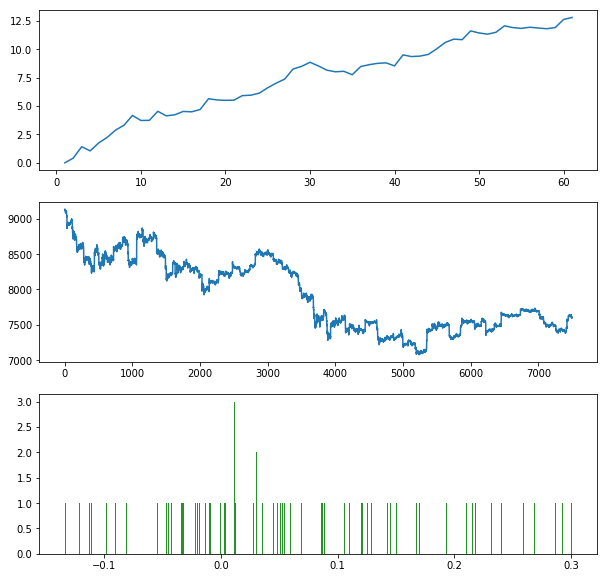

         0       1       2       3      4         5            6
0   9044.0  8911.0    30.0    66.0   36.0  1.335634     1.335634
1   8971.5  8614.5   109.0   209.0  100.0  1.998544     2.669324
2   8597.0  8662.0   255.0   264.0    9.0  0.774899     2.068456
3   8650.0  8427.5   265.0   316.0   51.0  1.622542     3.356156
4   8447.0  8302.0   349.0   426.0   77.0  1.399142     4.695738
5   8570.0  8369.5   485.0   534.0   49.0  1.561401     7.331930
6   8517.0  8388.0   602.0   680.0   78.0  1.346978     9.875947
7   8680.0  8392.5   897.0   976.0   79.0  1.818919    17.963551
8   8666.5  8746.0  1177.0  1186.0    9.0  0.735253    13.207759
9   8722.0  8706.0  1187.0  1210.0   23.0  1.008445    13.319303
10  8762.5  8499.0  1335.0  1408.0   73.0  1.737591    23.143504
11  8481.5  8552.0  1416.0  1423.0    7.0  0.756408    17.505928
12  8555.5  8194.0  1424.0  1530.0  106.0  1.065441    18.651537
13  8375.5  8288.0  1621.0  1664.0   43.0  1.226436    22.874913
14  8305.0  8299.5  1706.

In [133]:

## Short Only ##  (Why is it backwards???) ## 1 Minute! ##
leverage = 25
#price = pd.DataFrame(np.zeros((l-cci_len, 6)))
#mat = np.zeros((20, 1200))
#pnl = 1;
#leverage = 10
f=0
d=0
hi = 0
lo = -10
j = 0
k = 0
liq = 0
price = np.zeros((l-cci_len, 7))
for i in range(cci_len, l):
    if (CCI[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
    elif j == 1 and close[i] > (1/leverage/8 + 1)*price[k,0]:
        price[k, 1] = close[i]
        price[k, 3] = i 
        j = 0
        k = k+ 1
    elif (CCI[i] >= hi) and (j==1):
        #mat[j,k] = RSIclose[i]
        price[k, 3] = i 
        price[k, 1] = close[i]
        k = k+1
        j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X = 0
X2= abs(X-1)
p = 0
p2 = abs(p-1)
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 5] = pnl[i+1]
    price[i, 6] = pnlT[i+1]
    
    
price = pd.DataFrame(price)
print(np.average(price.iloc[:,4]))    

J = np.arange(1, l)
m = 3
plt.subplot(m,1,1)
#plt.plot(range())
plt.plot(range(1,len(pnl)+1), np.log2(pnlT), label='Boys per Time')
plt.subplot(m,1,3)
n, bins, patches = plt.hist(np.log10(pnl), 500, density=False, facecolor='g', alpha=0.85)
plt.subplot(m,1,2)
plt.plot(J, close[J], label='Boys per Time')
print(min(pnl))
print(np.average(pnl))
#print(sp.stats.normaltest(pnl))
print(liq)

plt.show()

## change into DataFrames ##


print(price)


In [ ]:
print(df_all['timestamp'].iloc[0])

In [25]:
close[259]

8617.5

In [26]:
CCI[259]

-35.880561124817866

In [14]:
leverage = 100
1/leverage/5+1

1.002

In [95]:
10**0.05

1.1220184543019633

In [99]:
np.log(1.12)

0.11332868530700327

In [113]:
2.7**-.5

0.6085806194501846

In [ ]:
4.579964*1.5759

In [ ]:
(7544/7416 - 1-.00075*2)*100

In [123]:
1.15**20

16.36653739294609

In [118]:
10**0.3

1.9952623149688795

In [125]:
1.09**40

31.409420053989354

In [ ]:
cci_len

In [ ]:
name

In [ ]:
## CCI and RSI init only ##
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 
l = len(close)
CCI = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len=15
TP = (high+low+close)/3
for i in range(cci_len, len(close)):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = abs(SMA[i]-TP[i])
    for j in range(1, cci_len):
        madmat[i] = madmat[i] + abs(SMA[i]-TP[i-j])
    madmat[i] = madmat[i]/cci_len
    CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0
k = 0

#mat = np.zeros((20, 1200))
#pnl = 1;
#leverage = 10
f=0
d=0
rsi_len = 100
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])
CCI = sp.signal.savgol_filter(CCI, 105, 3)


In [ ]:
def dl(end, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
M = 7
name = '1440_7_1m_Jun3.csv'
dl(1440*M, name)

In [ ]:
name = '1440_5m_Jun3.csv'

In [ ]:
name = '1440_30_Jun3.csv'

In [ ]:
name = '1440_7_Jun3.csv'

In [ ]:
name = '500J3.csv'

In [ ]:
def dlCCI(end, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=5m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()
            csvwriter.writerows(data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = pd.Series(df_all['close'])
    high = pd.Series(df_all['high'])
    low = pd.Series(df_all['low'])#close values 
    l = len(close)
    CCI = pd.Series(np.zeros(l))
    SMA = pd.Series(np.zeros(l))
    madmat = pd.Series(np.zeros(l))
    cci_len=30
    TP = (high+low+close)/3
    for i in range(cci_len, len(close)):
        SMA[i] = TP[i-cci_len:i].sum()/cci_len
        madmat[i] = abs(SMA[i]-TP[i])
        for j in range(1, cci_len):
            madmat[i] = madmat[i] + abs(SMA[i]-TP[i-j])
        madmat[i] = madmat[i]/cci_len
        CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
    j = 0
    k = 0
    CCI = sp.signal.savgol_filter(CCI, 105, 3)
    cci500df = pd.DataFrame(CCI)
    print(cci500df.iloc[l-1])

In [ ]:
dlshort_cci(500, '500J3_2.csv')

In [ ]:
def dl_starttime(name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=5m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low&startTime=2018-06-02T05%3A10%3A00.000Z"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            query['start'] += count
            #if query['start'] > num-1:
            #    break
            if len(data) < count:
                break
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = pd.Series(df_all['close'])
    high = pd.Series(df_all['high'])
    low = pd.Series(df_all['low'])#close values 
    l = len(close)
    CCI = pd.Series(np.zeros(l))
    SMA = pd.Series(np.zeros(l))
    madmat = pd.Series(np.zeros(l))
    cci_len=30
    TP = (high+low+close)/3
    for i in range(cci_len, len(close)):
        SMA[i] = TP[i-cci_len:i].sum()/cci_len
        madmat[i] = abs(SMA[i]-TP[i])
        for j in range(1, cci_len):
            madmat[i] = madmat[i] + abs(SMA[i]-TP[i-j])
        madmat[i] = madmat[i]/cci_len
        CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
    j = 0
    k = 0
    CCI_500 = sp.signal.savgol_filter(CCI, 105, 3)
    cci500df = pd.DataFrame(CCI_500)
    print(df_all['timestamp'])

In [ ]:
dl_starttime('boysnow.csv')

In [ ]:
dl_starttime('boysnow.csv')

In [ ]:
def dl1m(num,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > num:
                break
            if len(data) < count:
                break

In [5]:
def dl5m(start, num,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=5m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 300  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > num:
                break
            if len(data) < count:
                break

In [ ]:
boys_now = 1
n1 = 500
n2 = 1440
while True:
    time.sleep(1)
    t = pd.Series(datetime.datetime.now().timetuple())
    if t[5] == 0:
        n2 += 1
        dlCCI(n2, '1440j3_try.csv')
        
    else:
        boys_now


In [ ]:
dlshortCCI(500, '500J3_10.csv')

In [ ]:
dlCCI(1440, '1440j3_try.csv')

In [49]:
name=  '1440_10_5m_jun5.csv'

dl5m(1440*5,1440*10, name)

In [ ]:
name=  '1440_7_5m_jun4.csv'

In [ ]:
name = '1440_5m_jun4.csv'

In [126]:
name

'1440_10_5m_jun5.csv'

In [127]:
name = '1440_4_5m_jun5.csv'